In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url_data = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv"

dataset = pd.read_csv(url_data)
dataset.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [3]:
dataset.shape

(400, 3)

In [4]:
dataset.dtypes

Id                         int64
Sentiment                 object
Instagram Comment Text    object
dtype: object

In [5]:
dataset.isnull().sum()

Id                        0
Sentiment                 0
Instagram Comment Text    0
dtype: int64

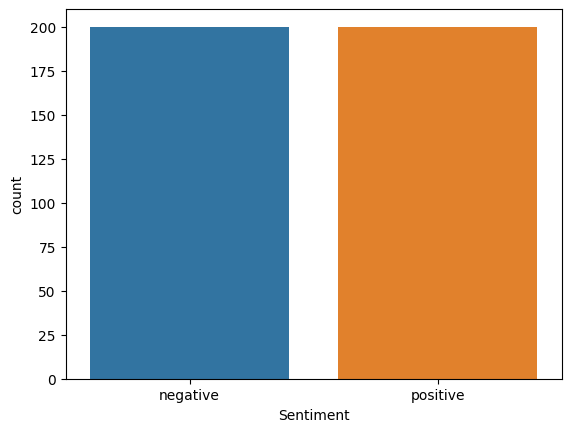

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='Sentiment',data=dataset)
plt.show()

### Text Preprocessing

In [7]:
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [8]:
clean_koment = []
for koment in dataset["Instagram Comment Text"]:
    def hapus_tanda(koment): 
        tanda_baca = set(string.punctuation)
        koment = ''.join(ch for ch in koment if ch not in tanda_baca)
        return koment
    
    koment=koment.lower()
    koment = re.sub(r'\\u\w\w\w\w', '', koment)
    koment=re.sub(r'http\S+','',koment)
    #hapus @username
    # koment=re.sub('@[^\s]+','',koment)
    #hapus #tagger 
    koment = re.sub(r'#([^\s]+)', r'\1', koment)
    #hapus tanda baca
    koment=hapus_tanda(koment)
    #hapus angka dan angka yang berada dalam string 
    koment=re.sub(r'\w*\d\w*', '',koment).strip()
    
    koment=re.sub('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+) ','',koment)
    # koment = re.sub(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+) 
    
    
    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    koment = stemmer.stem(koment)
    clean_koment.append(koment)

dataset['clean'] = clean_koment


In [9]:
dataset.head()

,Id,Sentiment,Instagram Comment Text,clean
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubung nya gugur dgn pa...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar tingg...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih mb...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kalau kesel dengan att nya gausah ke anak...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...


### Feature Extraction

Untuk menggunakan data ini dalam Machine Learning, kita harus mengubah konten setiap string atau teks menjadi vektor angka. Untuk itu kita akan menggunakan vectorizer TF-IDF.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['clean']).toarray()
y = dataset["Sentiment"]

In [11]:
X.shape

(400, 2733)

### Spliting Data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

((320, 2733), (80,))

### Naive Bayes Model

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nbModel = GaussianNB()
nbModel.fit(X_train, y_train)

GaussianNB()

### Evaluasi Model

In [14]:
y_pred = nbModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.78      0.81        46
    positive       0.73      0.79      0.76        34

    accuracy                           0.79        80
   macro avg       0.78      0.79      0.78        80
weighted avg       0.79      0.79      0.79        80



In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print('score presisi\t: ', precision_score(y_test, y_pred , average="macro"))
print('score recal\t: ', recall_score(y_test, y_pred , average="macro"))
print('score f1 \t: ', f1_score(y_test, y_pred , average="macro"))

score presisi	:  0.7834695160276556
score recal	:  0.7883631713554987
score f1 	:  0.784776072163317


In [17]:
#prediksi dengan teks diluar dataset

new_string = "bagus fotonya" 
s = [new_string]
new_X_test = vectorizer.transform(s).toarray()
pred = nbModel.predict(new_X_test)
print(f"kalimat ({new_string}), bermuatan {pred[0]}")

kalimat (bagus fotonya), bermuatan positive
